### Price predection using deep learning

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import tensorflow_docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import seaborn as sns


ImportError: cannot import name 'tensorflow_docs' from 'tensorflow' (C:\ff\envs\tf\lib\site-packages\tensorflow\__init__.py)

In [3]:
import pandas as pd
import numpy as np

Load the dataset

In [4]:
data = pd.read_csv (r'avocado.csv')   
print (data.head)

<bound method NDFrame.head of        AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
0              1.33      64236.62     8696.87     8603.62       93.25   
1              1.35      54876.98     9505.56     9408.07       97.49   
2              0.93     118220.22     8145.35     8042.21      103.14   
3              1.08      78992.15     5811.16     5677.40      133.76   
4              1.28      51039.60     6183.95     5986.26      197.69   
...             ...           ...         ...         ...         ...   
18244          1.63      17074.83    13498.67    13066.82      431.85   
18245          1.71      13888.04     9264.84     8940.04      324.80   
18246          1.87      13766.76     9394.11     9351.80       42.31   
18247          1.93      16205.22    10969.54    10919.54       50.00   
18248          1.62      17489.58    12014.15    11988.14       26.01   

       XLarge Bags  year  
0              0.0  2015  
1              0.0  2015  
2           

convert the data type of the dataset

In [53]:
data = data.astype(np.float32)


In [33]:
data['year']=data['year'].astype('float64')


Check if the data has missing values

In [30]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
dtype: int64

In [62]:
data.dtypes

AveragePrice    float32
Total Volume    float32
Total Bags      float32
Small Bags      float32
Large Bags      float32
XLarge Bags     float32
year            float32
dtype: object

Split the dataset into test and train

In [63]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

In [64]:
train_dataset.shape

(14599, 7)

In [65]:
test_dataset.shape

(3650, 7)

Plot the variables

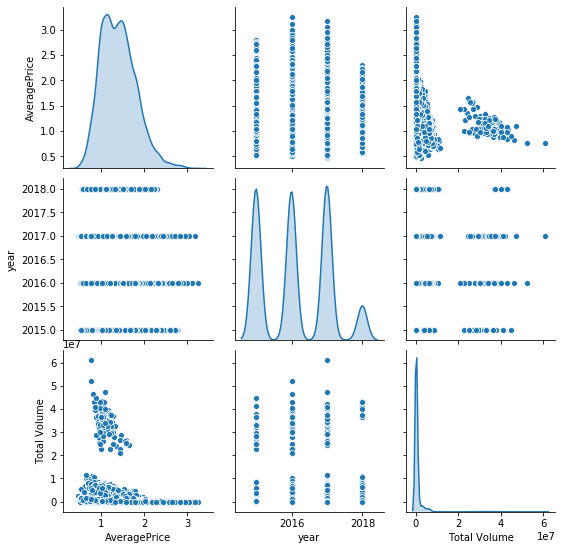

In [58]:
sns.pairplot(train_dataset[["AveragePrice", "year", "Total Volume"]], diag_kind="kde")


Drop the AveragePrice from train and test dataset

In [66]:
train_labels = train_dataset.pop('AveragePrice')
test_labels = test_dataset.pop('AveragePrice')

In [67]:
train_labels

9181     1.48
1013     1.05
14625    1.27
15234    2.15
18247    1.93
         ... 
3421     0.78
9448     2.01
2477     1.03
18067    1.33
12028    1.78
Name: AveragePrice, Length: 14599, dtype: float32

In [68]:
test_labels

2        0.93
3        1.08
10       1.12
19       1.33
28       1.32
         ... 
18216    1.52
18223    1.59
18233    1.80
18237    1.62
18241    1.57
Name: AveragePrice, Length: 3650, dtype: float32

In [69]:
train_stats= train_dataset.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Total Volume,14599.0,847665.062500,3.452565e+06,84.559998,10569.600098,104369.679688,424840.109375,6.103446e+07
Total Bags,14599.0,240084.750000,9.906858e+05,0.000000,4914.545166,38515.750000,109854.378906,1.639452e+07
Small Bags,14599.0,182425.921875,7.494745e+05,0.000000,2711.175049,25278.830078,83096.878906,1.256716e+07
Large Bags,14599.0,54582.105469,2.452326e+05,0.000000,124.530003,2622.780029,21910.164062,4.324231e+06
XLarge Bags,14599.0,3076.747803,1.762494e+04,0.000000,0.000000,0.000000,113.924999,5.516936e+05
year,14599.0,2016.147827,9.405907e-01,2015.000000,2015.000000,2016.000000,2017.000000,2.018000e+03


In [70]:
train_stats['std']

Total Volume    3.452565e+06
Total Bags      9.906858e+05
Small Bags      7.494745e+05
Large Bags      2.452326e+05
XLarge Bags     1.762494e+04
year            9.405907e-01
Name: std, dtype: float64

Normalize the dataset

In [81]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Build the model and determine the number of layers and nodes

In [83]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [84]:
model = build_model()


In [85]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [86]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.32105446],
       [-0.30031663],
       [-0.06700837],
       [ 0.06606639],
       [ 0.17898135],
       [ 0.06534065],
       [-0.08024953],
       [-0.08031387],
       [-0.08037165],
       [-0.3154682 ]], dtype=float32)

In [87]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:0.1896,  mae:0.3237,  mse:0.1896,  val_loss:0.1165,  val_mae:0.2644,  val_mse:0.1165,  
....................................................................................................
Epoch: 100, loss:0.0793,  mae:0.2105,  mse:0.0793,  val_loss:0.0786,  val_mae:0.2107,  val_mse:0.0786,  
....................................................................................................
Epoch: 200, loss:0.0755,  mae:0.2038,  mse:0.0755,  val_loss:0.0788,  val_mae:0.2087,  val_mse:0.0788,  
....................................................................................................
Epoch: 300, loss:0.0729,  mae:0.1994,  mse:0.0729,  val_loss:0.0755,  val_mae:0.2048,  val_mse:0.0755,  
....................................................................................................
Epoch: 400, loss:0.0715,  mae:0.1967,  mse:0.0715,  val_loss:0.0798,  val_mae:0.2076,  val_mse:0.0798,  
........................................................................

In [88]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.066383,0.188204,0.066383,0.073688,0.203699,0.073688,995
996,0.066186,0.188129,0.066186,0.077025,0.203403,0.077025,996
997,0.065965,0.187340,0.065965,0.073758,0.201730,0.073758,997
998,0.066245,0.188050,0.066245,0.072868,0.201725,0.072868,998
999,0.065885,0.187469,0.065885,0.076469,0.203978,0.076469,999


Text(0, 0.5, 'MAE [AveragePrice]')

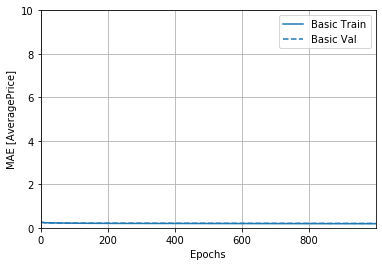

In [103]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [AveragePrice]')


Text(0, 0.5, 'MSE [AveragePrice^2]')

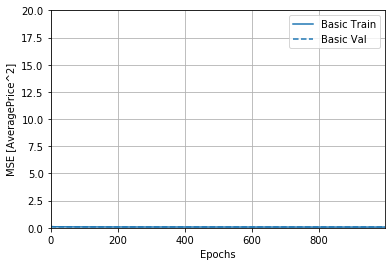

In [100]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [AveragePrice^2]')

In [104]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1776,  mae:0.3160,  mse:0.1776,  val_loss:0.1121,  val_mae:0.2586,  val_mse:0.1121,  
...................................................

In [106]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} AveragePrice".format(mae))

3650/3650 - 0s - loss: 0.0804 - mae: 0.2154 - mse: 0.0804
Testing set Mean Abs Error:  0.22 AveragePrice


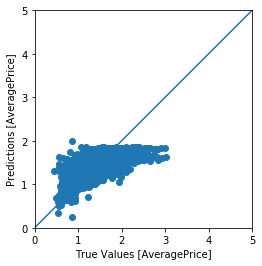

In [109]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [AveragePrice]')
plt.ylabel('Predictions [AveragePrice]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Evaluate the model

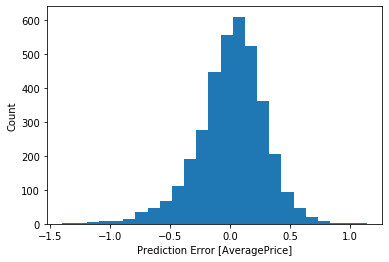

In [111]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [AveragePrice]")
_ = plt.ylabel("Count")

In [ ]:
Conclusion: In this code, we build model based on Keras